In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('creditcard.csv')
print(data.shape)

print(data['Class'].value_counts(normalize=True))

fraud = data[data['Class']==1]
print(fraud.shape)

nofraud = data[data['Class']==0]
print(nofraud.shape)

(284807, 31)
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64
(492, 31)
(284315, 31)


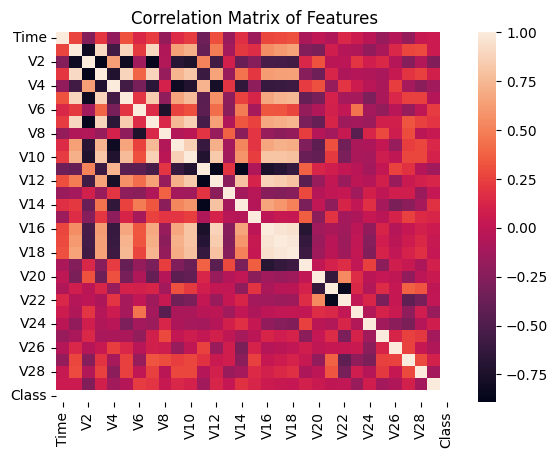

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr = fraud.corr()
sns.heatmap(corr)
plt.title('Correlation Matrix of Features')
plt.show()

In [4]:
x = data.drop(['Class'], axis=1)
y = data['Class']

Random Forest Classifier

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42, stratify=y)

random_forest = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
random_forest.fit(X_train,y_train)

Y_prediction = random_forest.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score, classification_report

n_errors = (Y_prediction != y_test).sum()
print("No.of errors:",n_errors)

print("Accuracy Score :")
print(accuracy_score(y_test,Y_prediction))

print("Classification Report :")
print(classification_report(y_test,Y_prediction))

No.of errors: 23
Accuracy Score :
0.9995962220427653
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962




ROC AUC Score: 0.9649751501613588

PR AUC Score: 0.8649083837178486


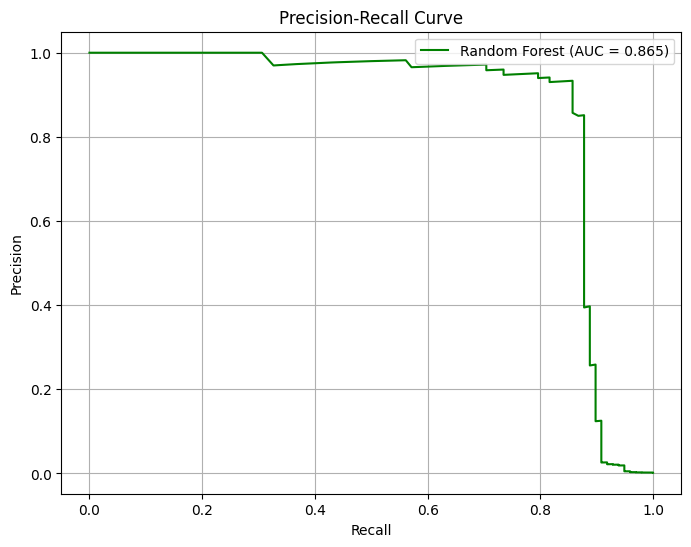

In [7]:
from sklearn.metrics import confusion_matrix,precision_recall_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, random_forest.predict_proba(X_test)[:, 1])
print(f"\nROC AUC Score: {roc_auc}")

from sklearn.metrics import average_precision_score
pr_auc = average_precision_score(y_test, random_forest.predict_proba(X_test)[:, 1])
print(f"\nPR AUC Score: {pr_auc}")

y_scores_rf = random_forest.predict_proba(X_test)[:, 1]
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_scores_rf)
auc_pr_rf = auc(recall_rf, precision_rf)

plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AUC = {auc_pr_rf:.3f})', color='green')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()


Random Forest with SMOTE

In [8]:
x = data.drop(['Class'], axis=1)
y = data['Class']

print(y.value_counts())



Class
0    284315
1       492
Name: count, dtype: int64


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42, stratify=y)

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(X_train, y_train)

print(y_sm.value_counts())

random_forest = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
random_forest.fit(x_sm,y_sm)

Y_prediction = random_forest.predict(X_test)

Class
0    227451
1    227451
Name: count, dtype: int64


In [10]:
from sklearn.metrics import accuracy_score, classification_report

n_errors = (Y_prediction != y_test).sum()
print("No.of errors:",n_errors)

print("Accuracy Score :")
print(accuracy_score(y_test,Y_prediction))

print("Classification Report :")
print(classification_report(y_test,Y_prediction))

No.of errors: 108
Accuracy Score :
0.9981039991573329
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.47      0.89      0.62        98

    accuracy                           1.00     56962
   macro avg       0.74      0.94      0.81     56962
weighted avg       1.00      1.00      1.00     56962




ROC AUC Score: 0.9776439381323717

PR AUC Score: 0.8260744874321664


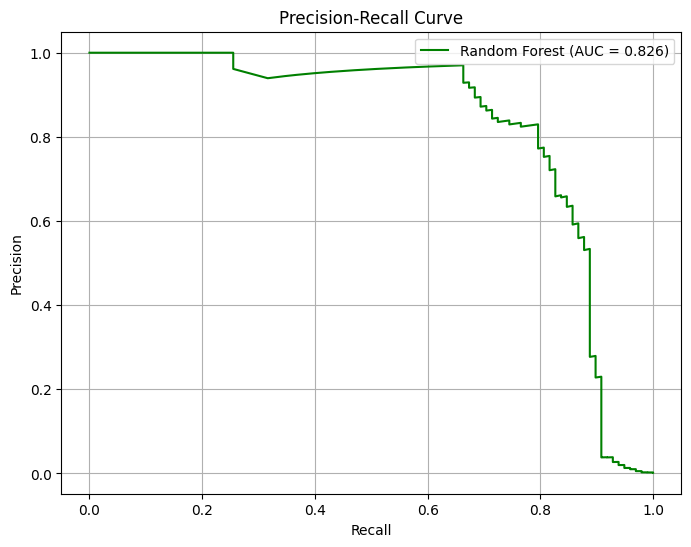

In [11]:
from sklearn.metrics import confusion_matrix,precision_recall_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, random_forest.predict_proba(X_test)[:, 1])
print(f"\nROC AUC Score: {roc_auc}")

from sklearn.metrics import average_precision_score
pr_auc = average_precision_score(y_test, random_forest.predict_proba(X_test)[:, 1])
print(f"\nPR AUC Score: {pr_auc}")

y_scores = random_forest.predict_proba(X_test)[:, 1]
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_scores)
auc_pr_rf = auc(recall_rf, precision_rf)

plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AUC = {auc_pr_rf:.3f})', color='green')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()


Borderline SMOTE

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42, stratify=y)

from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import train_test_split

smote = BorderlineSMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(X_train, y_train)

print(y_sm.value_counts())

random_forest_bd = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
random_forest_bd.fit(x_sm,y_sm)

Y_prediction = random_forest_bd.predict(X_test)

Class
0    227451
1    227451
Name: count, dtype: int64


In [13]:
from sklearn.metrics import accuracy_score, classification_report

n_errors = (Y_prediction != y_test).sum()
print("No.of errors:",n_errors)

print("Accuracy Score :")
print(accuracy_score(y_test,Y_prediction))

print("Classification Report :")
print(classification_report(y_test,Y_prediction))

No.of errors: 32
Accuracy Score :
0.9994382219725431
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.84      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962




ROC AUC Score: 0.9709804381094025

PR AUC Score: 0.7973762056843463


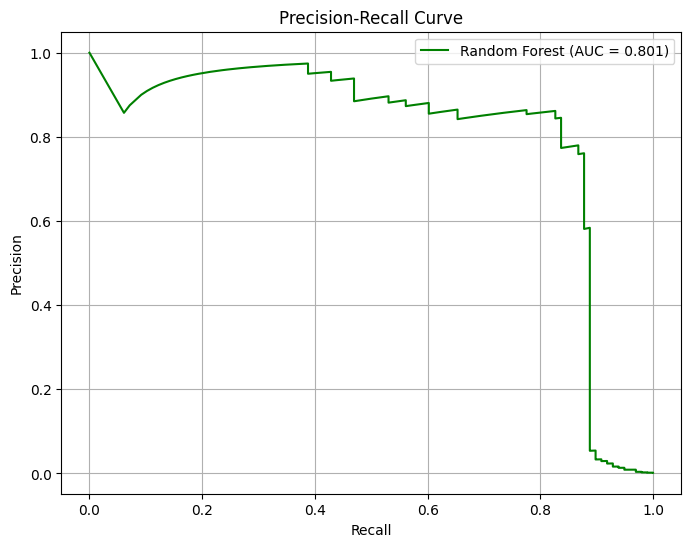

In [26]:
from sklearn.metrics import confusion_matrix,precision_recall_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, random_forest_bd.predict_proba(X_test)[:, 1])
print(f"\nROC AUC Score: {roc_auc}")

from sklearn.metrics import average_precision_score
pr_auc = average_precision_score(y_test, random_forest_bd.predict_proba(X_test)[:, 1])
print(f"\nPR AUC Score: {pr_auc}")

y_scores = random_forest_bd.predict_proba(X_test)[:, 1]
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_scores)
auc_pr_rf = auc(recall_rf, precision_rf)

plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AUC = {auc_pr_rf:.3f})', color='green')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()


XGBoost

In [15]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

class_0, class_1 = np.bincount(y_train)
scale_pos_weight = class_0 / class_1

xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)


In [16]:
from sklearn.metrics import accuracy_score, classification_report

n_errors = (y_pred != y_test).sum()
print("No.of errors:",n_errors)

print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))

print("Classification Report :")
print(classification_report(y_test,y_pred))

No.of errors: 32
Accuracy Score :
0.9994382219725431
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.84      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962




ROC AUC Score: 0.9682378578893572

PR AUC Score: 0.8800038893818777


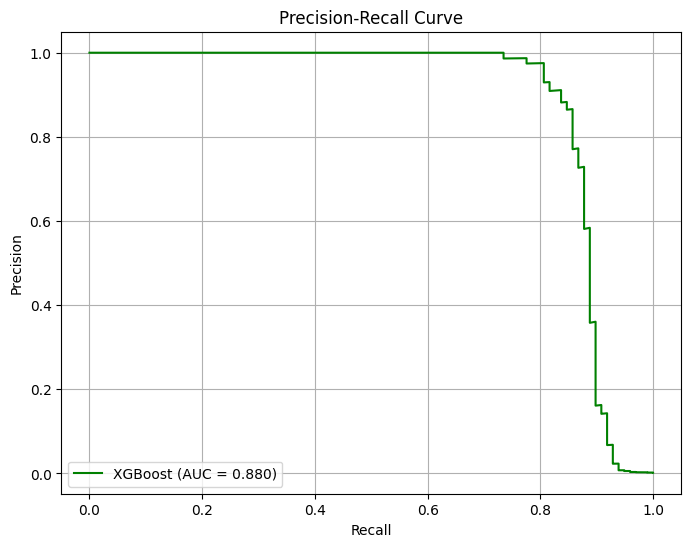

In [17]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, average_precision_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Y_prediction = xgb_model.predict(X_test)
y_scores = xgb_model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_scores)
print(f"\nROC AUC Score: {roc_auc}")

pr_auc = average_precision_score(y_test, y_scores)
print(f"\nPR AUC Score: {pr_auc}")

precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_scores)
auc_pr_xgb = auc(recall_xgb, precision_xgb)

plt.figure(figsize=(8, 6))
plt.plot(recall_xgb, precision_xgb, label=f'XGBoost (AUC = {auc_pr_xgb:.3f})', color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42, stratify=y)

from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import train_test_split

smote = BorderlineSMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(X_train, y_train)

print(y_sm.value_counts())

from xgboost import XGBClassifier
import numpy as np

class_0, class_1 = np.bincount(y_sm)
scale_pos_weight = class_0 / class_1

xgb_model_smote = XGBClassifier(scale_pos_weight=scale_pos_weight)
xgb_model_smote.fit(x_sm, y_sm)

y_pred_smote = xgb_model_smote.predict(X_test)

Class
0    227451
1    227451
Name: count, dtype: int64


In [28]:
from sklearn.metrics import accuracy_score, classification_report

n_errors = (y_pred_smote != y_test).sum()
print("No.of errors:",n_errors)

print("Accuracy Score :")
print(accuracy_score(y_test,y_pred_smote))

print("Classification Report :")
print(classification_report(y_test,y_pred_smote))

No.of errors: 27
Accuracy Score :
0.9995259997893332
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.82      0.86        98

    accuracy                           1.00     56962
   macro avg       0.95      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962




ROC AUC Score: 0.9672469508343574

PR AUC Score: 0.8532743859035835


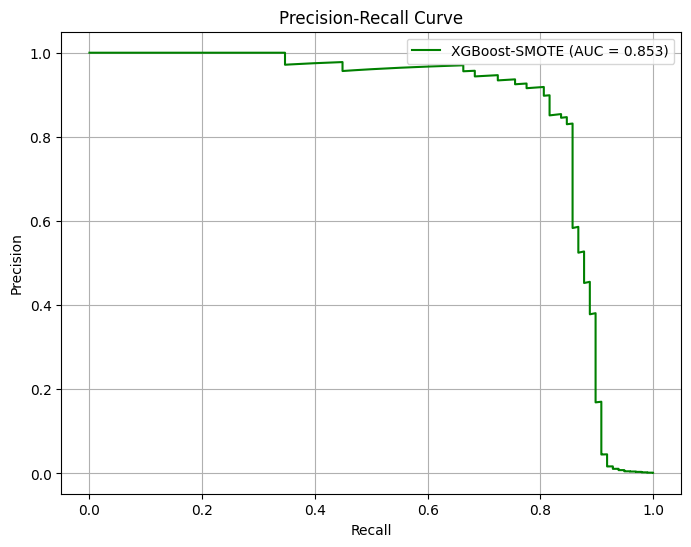

In [29]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, average_precision_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Y_prediction = xgb_model_smote.predict(X_test)
y_scores = xgb_model_smote.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_scores)
print(f"\nROC AUC Score: {roc_auc}")

pr_auc = average_precision_score(y_test, y_scores)
print(f"\nPR AUC Score: {pr_auc}")

precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_scores)
auc_pr_xgb = auc(recall_xgb, precision_xgb)

plt.figure(figsize=(8, 6))
plt.plot(recall_xgb, precision_xgb, label=f'XGBoost-SMOTE (AUC = {auc_pr_xgb:.3f})', color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()
